In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
# Import csv file 
data = pd.read_csv("../../housing.csv")

In [20]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# inspect the first 5 rows of the dataset
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Reduce the columns to seemingly relevant ones (using domain knowledge)

In [5]:
selected_columns = [
    'SalePrice', 'LotArea', 'Neighborhood', 'HouseStyle', 'YearBuilt', 
    'YearRemodAdd', 'Heating', 'CentralAir', 'TotRmsAbvGrd', 'FullBath', 
    'HalfBath', 'GrLivArea', 'GarageCars', 'PoolArea', 'OpenPorchSF'
]

reduced_df = data[selected_columns]


In [6]:
# Clean selected columns if necessary
#create df with selected columns only
df_selected_columns = data[selected_columns]

# Check for missing values
missing_values = df_selected_columns.isnull().sum()
print("Missing values in selected columns:\n", missing_values)

Missing values in selected columns:
 SalePrice       0
LotArea         0
Neighborhood    0
HouseStyle      0
YearBuilt       0
YearRemodAdd    0
Heating         0
CentralAir      0
TotRmsAbvGrd    0
FullBath        0
HalfBath        0
GrLivArea       0
GarageCars      0
PoolArea        0
OpenPorchSF     0
dtype: int64


In [8]:
# Create table
data = df_selected_columns.copy()

def format_example_values(series):
    vals = series.dropna().unique()[:5]
    
    formatted = []
    for v in vals:
        if isinstance(v, (int, float, np.number)):
            formatted.append(f"{v:.2f}")
        else:
            formatted.append(str(v))
    return ", ".join(formatted)

summary_df = pd.DataFrame({
    "Feature/variable": data.columns,
    "Data type": data.dtypes.values.astype(str),
    "Description": [""] * len(data.columns),
    "Number of Unique values": [data[col].nunique() for col in data.columns],
    "Example values": [format_example_values(data[col]) for col in data.columns]
})

# Show all rows without truncation
with pd.option_context("display.max_rows", None, "display.max_colwidth", None):
    print(summary_df.to_markdown(index=False))


| Feature/variable   | Data type   | Description   |   Number of Unique values | Example values                                        |
|:-------------------|:------------|:--------------|--------------------------:|:------------------------------------------------------|
| SalePrice          | int64       |               |                       663 | 208500.00, 181500.00, 223500.00, 140000.00, 250000.00 |
| LotArea            | int64       |               |                      1073 | 8450.00, 9600.00, 11250.00, 9550.00, 14260.00         |
| Neighborhood       | object      |               |                        25 | CollgCr, Veenker, Crawfor, NoRidge, Mitchel           |
| HouseStyle         | object      |               |                         8 | 2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer                |
| YearBuilt          | int64       |               |                       112 | 2003.00, 1976.00, 2001.00, 1915.00, 2000.00           |
| YearRemodAdd       | int64       |     

In [35]:
# Check data types
print("\nData types of selected columns:\n", df_selected_columns.dtypes)


Data types of selected columns:
 SalePrice        int64
LotArea          int64
Neighborhood    object
HouseStyle      object
YearBuilt        int64
YearRemodAdd     int64
Heating         object
CentralAir      object
TotRmsAbvGrd     int64
FullBath         int64
HalfBath         int64
GrLivArea        int64
GarageCars       int64
PoolArea         int64
OpenPorchSF      int64
dtype: object


In [11]:
# Split into numeric and categorical columns
numeric_cols = reduced_df.select_dtypes(include=[np.number]).columns.tolist()
#drop taret variable from numeric cols
numeric_cols.remove('SalePrice')
categorical_cols = reduced_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['LotArea', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'FullBath', 'HalfBath', 'GrLivArea', 'GarageCars', 'PoolArea', 'OpenPorchSF']
Categorical columns: ['Neighborhood', 'HouseStyle', 'Heating', 'CentralAir']


In [13]:
# Create table for numeric columns
# numeric variables only (target + predictors)

# Basic descriptive statistics
desc = data[numeric_cols].describe().rename(index={
    "50%": "50%",
    "25%": "25%",
    "75%": "75%"
})

# Add variance
desc.loc["Variance"] = data[numeric_cols].var()

# Add dispersion index = variance / mean
dispersion_index = data[numeric_cols].var() / data[numeric_cols].mean()
desc.loc["Dispersion index (Variance / Mean)"] = dispersion_index

# Reorder rows to match your required format
row_order = [
    "count", "mean", "std", "min", "25%", "50%", "75%", "max",
    "Variance", "Dispersion index (Variance / Mean)"
]
desc = desc.loc[row_order]

# Convert to Markdown
md_table = desc.to_markdown(tablefmt="pipe", floatfmt=".3f")
print(md_table)

|                                    |      LotArea |   YearBuilt |   YearRemodAdd |   TotRmsAbvGrd |   FullBath |   HalfBath |   GrLivArea |   GarageCars |   PoolArea |   OpenPorchSF |
|:-----------------------------------|-------------:|------------:|---------------:|---------------:|-----------:|-----------:|------------:|-------------:|-----------:|--------------:|
| count                              |     1460.000 |    1460.000 |       1460.000 |       1460.000 |   1460.000 |   1460.000 |    1460.000 |     1460.000 |   1460.000 |      1460.000 |
| mean                               |    10516.828 |    1971.268 |       1984.866 |          6.518 |      1.565 |      0.383 |    1515.464 |        1.767 |      2.759 |        46.660 |
| std                                |     9981.265 |      30.203 |         20.645 |          1.625 |      0.551 |      0.503 |     525.480 |        0.747 |     40.177 |        66.256 |
| min                                |     1300.000 |    1872.000 |   

In [ ]:
# Descriptive table for categorical variables

cat_desc = pd.DataFrame(index=categorical_cols, columns=[
    "Unique Values", "Most Frequent", "Frequency", "Percentage"
])

for col in categorical_cols:
    counts = data[col].value_counts(dropna=False)
    most_freq_val = counts.idxmax()
    freq = counts.max()
    perc = freq / counts.sum() * 100

    cat_desc.loc[col] = [
        data[col].nunique(),
        most_freq_val,
        freq,
        perc
    ]

# Convert to Markdown
md_table_cat = cat_desc.to_markdown(tablefmt="pipe", floatfmt=".2f")
print(md_table_cat)

|              |   Unique Values | Most Frequent   |   Frequency |   Percentage |
|:-------------|----------------:|:----------------|------------:|-------------:|
| Neighborhood |              25 | NAmes           |      225.00 |        15.41 |
| HouseStyle   |               8 | 1Story          |      726.00 |        49.73 |
| Heating      |               6 | GasA            |     1428.00 |        97.81 |
| CentralAir   |               2 | Y               |     1365.00 |        93.49 |


In [30]:
# Check multicollinearity (VIF) for numeric variables
vif_df = pd.DataFrame()
vif_df['feature'] = numeric_cols
vif_df['VIF'] = [variance_inflation_factor(reduced_df[numeric_cols].values, i) 
                 for i in range(len(numeric_cols))]

print("\nVariance Inflation Factors (numeric predictors):")
print(vif_df.sort_values('VIF', ascending=False))


Variance Inflation Factors (numeric predictors):
        feature          VIF
1     YearBuilt  8153.704734
2  YearRemodAdd  8097.332297
3  TotRmsAbvGrd    55.269870
6     GrLivArea    44.075356
4      FullBath    18.370616
7    GarageCars    10.111274
0       LotArea     2.322336
5      HalfBath     2.131757
9   OpenPorchSF     1.714965
8      PoolArea     1.060630


In [ ]:
# Sort VIFs descending for better visualization
vif_sorted = vif_df.sort_values("VIF", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x="VIF", y="feature", data=vif_sorted, palette="viridis")
plt.axvline(10, color='red', linestyle='--', label='VIF = 10 threshold')
plt.xlabel("VIF")
plt.ylabel("Feature")
plt.title("Variance Inflation Factor (VIF) of Features")
plt.xlim(0, 15)  # Set x-axis scale from 0 to 15
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
# Chi-square test for categorical variables
chi2_results = []

for var1, var2 in combinations(categorical_cols, 2):
    table = pd.crosstab(reduced_df[var1], reduced_df[var2])
    chi2, p, dof, _ = chi2_contingency(table)
    chi2_results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Chi2': chi2,
        'p-value': p
    })

chi2_df = pd.DataFrame(chi2_results).sort_values('p-value')

print("\nChi-Square Test Results (categorical predictors):")
print(chi2_df)


Chi-Square Test Results (categorical predictors):
     Variable 1  Variable 2         Chi2        p-value
0  Neighborhood  HouseStyle  1047.260852  5.596558e-127
5       Heating  CentralAir   314.829582   6.481698e-66
2  Neighborhood  CentralAir   237.084478   5.903339e-37
3    HouseStyle     Heating   180.295433   1.819549e-21
4    HouseStyle  CentralAir    86.375224   6.854147e-16
1  Neighborhood     Heating   141.108758   9.135857e-02


Here, numeric predictors >10 indicate multicollinarity. Therefore, we can drop some of the columns.

Remove extremely collinear pair:
YearBuilt vs YearRemodAdd
VIF > 8000 → almost perfectly correlated.
Keep YearBuilt (original construction year is usually more informative), drop YearRemodAdd.
TotRmsAbvGrd vs GrLivArea
Both VIF > 50 → very strong correlation.
Keep GrLivArea (total living area often better predictor than number of rooms), drop TotRmsAbvGrd.
FullBath & GarageCars
VIF 18 and 12 → moderately high correlation with GrLivArea.
Both can be kept, but if we want minimal multicollinearity, we might want to drop GarageCars (size of the house captured in GrLivArea and number of bathrooms).


Housing Style and Neighborhood -> Chi-square test showed a very strong association (p ≈ 0) → multicollinearity-like effect for categorical predictors.
By dropping HouseStyle and keeping Neighborhood, we remove this redundancy.
Heating vs CentralAir ->Strong association (p ≈ 0) → keeping only CentralAir avoids multicollinearity.
Dropping Heating is sufficient.

In [31]:
reduced_cols = [
    'LotArea',
    'YearBuilt',
    'GrLivArea',
    'FullBath',
    'HalfBath',
    'OpenPorchSF',
    'PoolArea',
    'Neighborhood',
    'Heating',
    'SalePrice'
]

Linearity Observation:
Most points cluster around 0 → linearity is mostly fine.
Slight curvature or widening at higher fitted values → some non-linearity may be present for very high-priced homes.

Homoscedasticity Observation:
Spread increases as fitted values increase (funnel shape).
Indicates heteroscedasticity — variance of residuals increases for expensive houses.
This is common in housing data.

Outliers / Extreme residuals
There are a few very large negative residuals (points far below 0).
These are underpredicted homes → could be unusual properties (large, luxury homes, or data entry errors).
Worth checking via Cook’s distance / influence plot to see if they are highly influential.


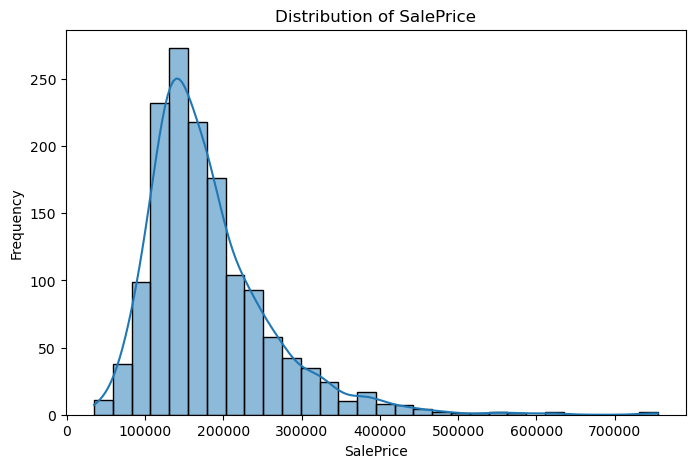

In [32]:
# Check some distributions
# SalesPrice distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(reduced_df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(reduced_df[reduced_cols], test_size=0.2, random_state=42)
print(f"Training set size: {train_df.shape}")
print(f"Validation set size: {val_df.shape}")

Training set size: (1022, 10)
Validation set size: (438, 10)


In [41]:
# Run GLM model
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = 'SalePrice ~ LotArea + YearBuilt + GrLivArea + FullBath + HalfBath + OpenPorchSF + PoolArea + C(Neighborhood) + C(Heating)'
glm_model = smf.glm(formula=formula, data=train_df, family=sm.families.Gaussian()).fit()
print(glm_model.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1022
Model:                            GLM   Df Residuals:                      985
Model Family:                Gaussian   Df Model:                           36
Link Function:               Identity   Scale:                      1.5492e+09
Method:                          IRLS   Log-Likelihood:                -12245.
Date:                Thu, 11 Dec 2025   Deviance:                   1.5260e+12
Time:                        16:14:54   Pearson chi2:                 1.53e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9462
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [56]:
# Create a DataFrame with the model statistics: Deviance, Null Deviance, Deviance Explained, Log_likelihood, AIC
model_stats = {
    'Deviance': round(glm_model.deviance,2),
    'Null Deviance': round(glm_model.null_deviance,2),
    'Deviance Explained': (glm_model.null_deviance - glm_model.deviance) / glm_model.null_deviance,
    'Log-Likelihood': round(glm_model.llf,2),
    'AIC': round(glm_model.aic,2)
}
print(model_stats)

{'Deviance': np.float64(1525964339570.53), 'Null Deviance': np.float64(6150984128205.52), 'Deviance Explained': np.float64(0.7519154158481445), 'Log-Likelihood': np.float64(-12244.59), 'AIC': np.float64(24563.17)}


In [58]:
# Create a df with predictor coefficients, std errors, z-values, p-values, conf intervals
coeff_summary = glm_model.summary2().tables[1]
print("\nGLM Coefficients Summary:")
print(coeff_summary)


GLM Coefficients Summary:
                                   Coef.       Std.Err.          z  \
Intercept                  -1.514511e+06  184992.277602  -8.186887   
C(Neighborhood)[T.Blueste] -2.980406e+04   40972.922194  -0.727409   
C(Neighborhood)[T.BrDale]  -3.715488e+04   16156.838726  -2.299638   
C(Neighborhood)[T.BrkSide] -1.681069e+02   13904.362467  -0.012090   
C(Neighborhood)[T.ClearCr]  8.987242e+03   14801.579894   0.607181   
C(Neighborhood)[T.CollgCr]  5.296957e+03   11310.176446   0.468335   
C(Neighborhood)[T.Crawfor]  3.396299e+04   13671.521931   2.484214   
C(Neighborhood)[T.Edwards] -2.747987e+04   12199.435394  -2.252552   
C(Neighborhood)[T.Gilbert] -6.203857e+03   12112.458884  -0.512188   
C(Neighborhood)[T.IDOTRR]  -1.366710e+04   14966.512584  -0.913179   
C(Neighborhood)[T.MeadowV] -4.449506e+04   16723.147022  -2.660687   
C(Neighborhood)[T.Mitchel] -1.423212e+04   12772.734151  -1.114258   
C(Neighborhood)[T.NAmes]   -8.807937e+03   11866.671334  -0.742

In [59]:
# Remove pool area from model and rerun
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = 'SalePrice ~ LotArea + YearBuilt + GrLivArea + FullBath + HalfBath + OpenPorchSF + C(Neighborhood) + C(Heating)'
glm_model = smf.glm(formula=formula, data=train_df, family=sm.families.Gaussian()).fit()
print(glm_model.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1022
Model:                            GLM   Df Residuals:                      986
Model Family:                Gaussian   Df Model:                           35
Link Function:               Identity   Scale:                      1.5476e+09
Method:                          IRLS   Log-Likelihood:                -12245.
Date:                Thu, 11 Dec 2025   Deviance:                   1.5260e+12
Time:                        16:29:34   Pearson chi2:                 1.53e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9463
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [60]:
# Remove heating as the entire variable has no significant p-values
# Remove pool area from model and rerun
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = 'SalePrice ~ LotArea + YearBuilt + GrLivArea + FullBath + HalfBath + OpenPorchSF + C(Neighborhood)'
glm_model = smf.glm(formula=formula, data=train_df, family=sm.families.Gaussian()).fit()
print(glm_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1022
Model:                            GLM   Df Residuals:                      991
Model Family:                Gaussian   Df Model:                           30
Link Function:               Identity   Scale:                      1.5452e+09
Method:                          IRLS   Log-Likelihood:                -12246.
Date:                Thu, 11 Dec 2025   Deviance:                   1.5313e+12
Time:                        16:34:37   Pearson chi2:                 1.53e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9464
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [64]:
# check results on validation set
val_pred = glm_model.predict(val_df)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_true = val_df['SalePrice']
y_pred = val_pred

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Validation RMSE:", rmse)
print("Validation MAE:", mae)
print("Validation R²:", r2)


Validation RMSE: 38441.43333438472
Validation MAE: 24539.092728149106
Validation R²: 0.7882310201858009


In [75]:
# Print AIC
print("Model AIC:", glm_model.aic)

Model AIC: 24554.73405923849


The model is performing well on the validation set.
It predicts general trends in housing prices accurately, but:
High-priced or unusual homes may still be under- or over-predicted (as indicated by RMSE > MAE).
Some overfitting exists (training R² 0.946 → validation R² 0.788).

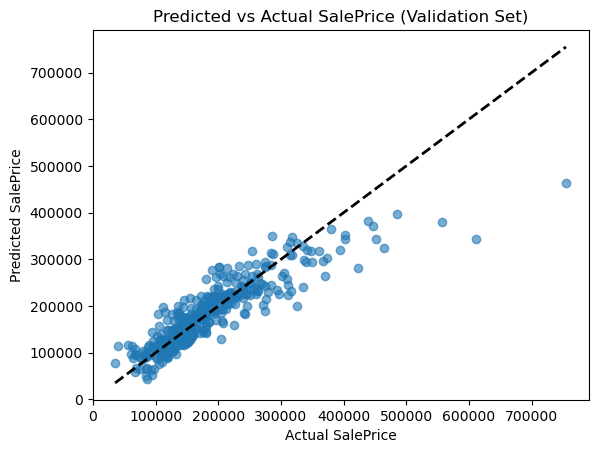

In [63]:
import matplotlib.pyplot as plt

plt.scatter(y_true, y_pred, alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice (Validation Set)")
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'k--', lw=2)  # reference line
plt.show()


Model predicts moderately priced homes well.
Underestimates high-priced homes, which inflates RMSE relative to MAE. To hopefully be able to estimate homes with high prices better, we will take a look at what happens when we log transform sales prices

In [65]:
import numpy as np

# Apply log transformation
train_df['log_SalePrice'] = np.log(train_df['SalePrice'])
val_df['log_SalePrice'] = np.log(val_df['SalePrice'])


In [67]:
formula_log = """
log_SalePrice ~ LotArea + YearBuilt + GrLivArea + FullBath + HalfBath
                 + C(Neighborhood)
"""

In [68]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

glm_log = smf.glm(
    formula=formula_log,
    data=train_df,
    family=sm.families.Gaussian()
).fit()

print(glm_log.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          log_SalePrice   No. Observations:                 1022
Model:                            GLM   Df Residuals:                      992
Model Family:                Gaussian   Df Model:                           29
Link Function:               Identity   Scale:                        0.036008
Method:                          IRLS   Log-Likelihood:                 263.64
Date:                Thu, 11 Dec 2025   Deviance:                       35.720
Time:                        18:08:07   Pearson chi2:                     35.7
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9644
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [69]:
# Predict log(SalePrice) on validation
val_pred_log = glm_log.predict(val_df)

# Back-transform to original SalePrice scale
val_pred = np.exp(val_pred_log)


In [ ]:
glm_log = smf.glm(
    formula=formula_log,
    data=val_df,
    family=sm.families.Gaussian()
).fit()

print(glm_log.summary())

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = val_df['SalePrice']
y_pred = val_pred

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Validation RMSE:", rmse)
print("Validation MAE:", mae)
print("Validation R²:", r2)


Validation RMSE: 35538.48832216898
Validation MAE: 23128.648950708415
Validation R²: 0.8190072825769923


The model performs slightly better with log transformed sales prices

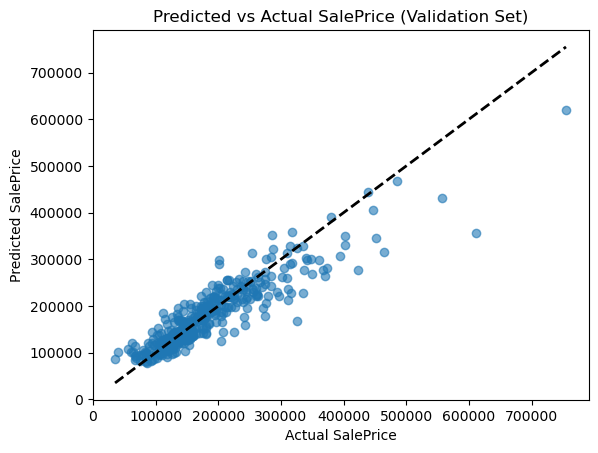

In [73]:
# Plot residuals of model with log transformed Sales Prices
plt.scatter(y_true, y_pred, alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice (Validation Set)")
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'k--', lw=2)  # reference line
plt.show()


In [74]:
# Print AIC
print("Model AIC:", glm_model.aic)

Model AIC: 24554.73405923849


In [ ]:
#  Visualize VIFs
# Sort VIFs descending for better visualization
vif_sorted = vif_df.sort_values("VIF", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x="VIF", y="feature", data=vif_sorted, palette="viridis")
plt.axvline(10, color='red', linestyle='--', label='VIF = 10 threshold')
plt.xlabel("VIF")
plt.ylabel("Feature")
plt.title("Variance Inflation Factor (VIF) of Features")
plt.xlim(0, 15)  # Set x-axis scale from 0 to 15
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'sns' is not defined

In [ ]:
# Vizualize sales price vs living area
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
sns.regplot(x='GrLivArea', y='SalePrice', data=data, scatter=False, color='red')
plt.title('House Size vs Sale Price')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

In [ ]:
# Visualize sales price by neighborhood
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Neighborhood')
plt.show()

In [ ]:
# Visualize House Price vs Year Built
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data)
sns.regplot(x='YearBuilt', y='SalePrice', data=data, scatter=False, color='red')
plt.title('House Age vs Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

The model still struggles to predict prices for higher priced houses, but performs slightly better